In [45]:
### TODO
# Compute total force on ballcarrier at each frame
#------
#Does it work better if I have a negative in front of the angle?
# check correlation between force/ total theta and actual runner motion!!
# player leaderboards
#clean up vis

In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML
import seaborn as sns
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bdbfinaldata2024-1/Cleaned_Data_2024.parquet
/kaggle/input/nfl-big-data-bowl-2024/players.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2024/games.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2024/tackles.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2024/plays.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv
/kaggle/input/finalbdbdata-2024-2/Cleaned_Data_2024_1_6_2.parquet
/kaggle/input/finalbdbdata-2024-2/Cleaned_Data_2024_1_7.parquet
/kaggle/input/finalbdbdata-2024-2/Cleaned_Data_2024_1_7_3.parquet
/kaggle/input/finalbdbdata-2024-2/Cleane

In [47]:
plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/plays.csv')

In [48]:
tackles = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tackles.csv')

In [49]:
data_raw = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv')

In [50]:
data_raw.query('gameId == 2022090800 & playId == 122 & displayName == "Devin Singletary"').head(10)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
2752,2022090800,122,47857.0,Devin Singletary,1,2022-09-08 20:25:51.000000,26.0,BUF,left,68.96,36.49,3.94,1.47,0.38,142.28,326.08,NaN
2753,2022090800,122,47857.0,Devin Singletary,2,2022-09-08 20:25:51.099999,26.0,BUF,left,68.73,36.83,4.11,1.19,0.41,134.58,326.78,NaN
2754,2022090800,122,47857.0,Devin Singletary,3,2022-09-08 20:25:51.200000,26.0,BUF,left,68.52,37.19,4.26,1.16,0.42,113.42,329.16,pass_arrived
2755,2022090800,122,47857.0,Devin Singletary,4,2022-09-08 20:25:51.299999,26.0,BUF,left,68.30,37.58,4.44,1.33,0.44,89.34,331.75,NaN
2756,2022090800,122,47857.0,Devin Singletary,5,2022-09-08 20:25:51.400000,26.0,BUF,left,68.10,37.98,4.62,1.52,0.46,69.78,333.98,NaN
2757,2022090800,122,47857.0,Devin Singletary,6,2022-09-08 20:25:51.500000,26.0,BUF,left,67.89,38.41,4.75,1.46,0.47,52.19,335.55,pass_outcome_caught
2758,2022090800,122,47857.0,Devin Singletary,7,2022-09-08 20:25:51.599999,26.0,BUF,left,67.70,38.85,4.88,1.22,0.48,34.33,336.59,NaN
2759,2022090800,122,47857.0,Devin Singletary,8,2022-09-08 20:25:51.700000,26.0,BUF,left,67.49,39.32,5.08,1.11,0.51,20.40,337.24,NaN
2760,2022090800,122,47857.0,Devin Singletary,9,2022-09-08 20:25:51.799999,26.0,BUF,left,67.28,39.80,5.31,1.06,0.52,7.28,336.42,NaN
2761,2022090800,122,47857.0,Devin Singletary,10,2022-09-08 20:25:51.900000,26.0,BUF,left,67.06,40.29,5.47,1.00,0.54,3.73,336.28,NaN


In [51]:
data_cleaned = pd.read_parquet('/kaggle/input/finalbdbdata-2024-2/Cleaned_Data_2024_1_7_3.parquet')

In [52]:
data_cleaned

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370003,27.270000,1.62,1.15,0.16,231.740005,147.899994,None,2022,1,09/08/2022,20:20:00,10,31,BUF,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1988-06-06,Indiana,G,22,True,True,35,31.629997,26.063332,231.740005,38.260010,4.044626,5.615422,147.899994,122.100006,2.581342,2.131047,3.623843,78.370003,-0.86,1.37,0.0,0.0,0.000000,39.400002,15.043331,4.015130,1.407084,1.02,6.15,0.0,0.0,0.000000,-7.770004,11.020000,13.483819,-1.88,-4.78,5.136419,34.949997,19.523331,-3.32,6.540001,7.334440,15.043331,-3.370003
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470001,27.129999,1.67,0.61,0.17,230.979996,148.529999,pass_arrived,2022,1,09/08/2022,20:20:00,10,31,BUF,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1988-06-06,Indiana,G,22,True,True,35,31.529999,26.203333,230.979996,39.020020,4.031362,5.602158,148.529999,121.470001,2.592338,2.120051,3.735690,78.470001,-0.87,1.42,-0.1,0.5,1.768192,39.519997,15.653332,3.913377,1.377414,1.20,6.12,1.8,-0.3,-0.165149,-7.989998,10.550001,13.234144,-2.07,-4.70,5.135650,36.849998,18.503330,-5.32,7.700003,9.359083,15.653332,-3.470001
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.559998,27.010000,1.57,0.49,0.15,230.979996,147.050003,None,2022,1,09/08/2022,20:20:00,10,31,BUF,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1988-06-06,Indiana,G,22,True,True,35,31.440002,26.323332,230.979996,39.020020,4.031362,5.602158,147.050003,122.950012,2.566507,2.145882,3.511996,78.559998,-0.85,1.32,0.2,-1.0,-1.373401,39.660004,16.243332,3.790157,1.319469,1.49,5.79,2.9,-3.3,-0.849825,-8.220001,10.080000,13.006722,-2.34,-4.47,5.045444,38.260002,17.743332,-6.82,8.580000,10.960328,16.243332,-3.559998
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.639999,26.900000,1.44,0.89,0.14,232.380005,145.419998,None,2022,1,09/08/2022,20:20:00,10,31,BUF,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,None,None,NaN,NaN,NaN,NaN,N

In [53]:
data_1 = data_cleaned

In [54]:
data_1['onDefense'] = data_1.club == data_1.defensiveTeam

In [55]:
#See if offense, defense, ballcarrier, or football
data_1['role_label'] = "Offense"
data_1.loc[data_1.onDefense, 'role_label'] = "Defense"
data_1.loc[data_1.nflId == data_1.ballCarrierId, 'role_label'] = "Ballcarrier"
data_1.loc[data_1.club == "football", 'role_label'] = "Football"

In [56]:
data_1.columns[4:]

Index(['frameId', 'time', 'jerseyNumber', 'club', 'playDirection', 'x', 'y',
       's', 'a', 'dis',
       ...
       'ballc_diff_speed_total', 'football_X', 'football_Y', 'ball_dx',
       'ball_dy', 'dist_ball', 'dist_side_top_ballc', 'dist_los', 'onDefense',
       'role_label'],
      dtype='object', length=105)

In [57]:
pos_cols = ['gameId','playId','nflId','displayName','position','frameId','last_frame','club','possessionTeam','X_std','Y_std','o_deg_std','o_rad_std','dir_deg_std','dir_rad_std','speed_x','speed_y','ballc_X','ballc_Y','ballc_o_rad_std','ballc_dir_rad_std','ballc_dx','ballc_dy','ballc_diff_speed_x','ballc_diff_speed_y','dist_ballc','event','role_label']

In [58]:
data_1[pos_cols]

,gameId,playId,nflId,displayName,position,frameId,last_frame,club,possessionTeam,X_std,Y_std,o_deg_std,o_rad_std,dir_deg_std,dir_rad_std,speed_x,speed_y,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_dx,ballc_dy,ballc_diff_speed_x,ballc_diff_speed_y,dist_ballc,event,role_label
0,2022090800,56,35472.0,Rodger Saffold,G,1,22,BUF,BUF,31.629997,26.063332,38.260010,5.615422,122.100006,2.131047,-0.86,1.37,39.400002,15.043331,4.015130,1.407084,-7.770004,11.020000,-1.88,-4.78,13.483819,None,Offense
1,2022090800,56,35472.0,Rodger Saffold,G,2,22,BUF,BUF,31.529999,26.203333,39.020020,5.602158,121.470001,2.120051,-0.87,1.42,39.519997,15.653332,3.913377,1.377414,-7.989998,10.550001,-2.07,-4.70,13.234144,pass_arrived,Offense
2,2022090800,56,35472.0,Rodger Saffold,G,3,22,BUF,BUF,31.440002,26.323332,39.020020,5.602158,122.950012,2.145882,-0.85,1.32,39.660004,16.243332,3.790157,1.319469,-8.220001,10.080000,-2.34,-4.47,13.006722,None,Offense
3,2022090800,56,35472.0,Rodger Saffold,G,4,22,BUF,BUF,31.360001,26.433332,37.619995,5.626593,124.580017,2.174331,-0.82,1.19,39.809998,16.803333,3.677758,1.274614,-8.449997,9.629999,-2.47,-4.23,12.811687,None,Offense
4,2022090800,56,35472.0,Rodger Saffold,G,5,22,BUF,BUF,31.279999,26.533333,36.640015,5.643697,128.049988,2.234894,-0.80,1.02,39.989998,17.333332,3.631507,1.229759,-8.709999,9.200001,-2.62,-4.10,12.669021,None,Offense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,NaN,football,None,49,53,football,DEN,63.779999,43.443333,NaN,NaN,NaN,NaN,NaN,NaN,63.939999,42.943333,5.901831,5.190260,-0.160000,0.500000,NaN,NaN,0.524976,tackle,Football
1407435,2022091200,3826,NaN,football,None,50,53,football,DEN,63.939999,43.253334,NaN,NaN,NaN,NaN,NaN,NaN,64.040001,42.753334,6.109351,5.210680,-0.100002,0.500000,NaN,NaN,0.509902,None,Football
1407436,2022091200,3826,NaN,football,None,51,53,football,DEN,64.110001,43.063332,NaN,NaN,NaN,NaN,NaN,NaN,64.130005,42.593330,6.189461,5.227087,-0.020004,0.470001,NaN,NaN,0.470427,None,Football
1407437,2022091200,3826,NaN,football,None,52,53,football,DEN,64.270004,42.893333,NaN,NaN,NaN,NaN,NaN,NaN,64.209999,42.473331,6.255610,5.296551,0.060005,0.420002,NaN,NaN,0.424267,None,Football


In [59]:
repulsion_test = data_1.query('club == defensiveTeam')[pos_cols]

In [60]:
#numerator_r is the numerator on the repulsion formula
#it's positive if the force is going left for the ballcarrier
numberator_r_x = -1
numerator_r_y = -1

In [61]:
#changed the distances for x and y to ballc
repulsion_test['repulse_x'] = numberator_r_x*repulsion_test.ballc_diff_speed_x/(repulsion_test.dist_ballc + .01)**2

repulsion_test['repulse_y'] = numerator_r_y*repulsion_test.ballc_diff_speed_y/(repulsion_test.dist_ballc + .01)**2

repulsion_test['repulse_total'] = np.sqrt((repulsion_test.ballc_diff_speed_x ** 2) + (repulsion_test.ballc_diff_speed_y **2))/(repulsion_test.dist_ballc+.01)**2

repulsion_test['indiv_F_theta'] = np.arctan(repulsion_test.repulse_y / repulsion_test.repulse_x)

repulsion_test['repulse_y_x_ratio'] = repulsion_test.repulse_y / repulsion_test.repulse_x

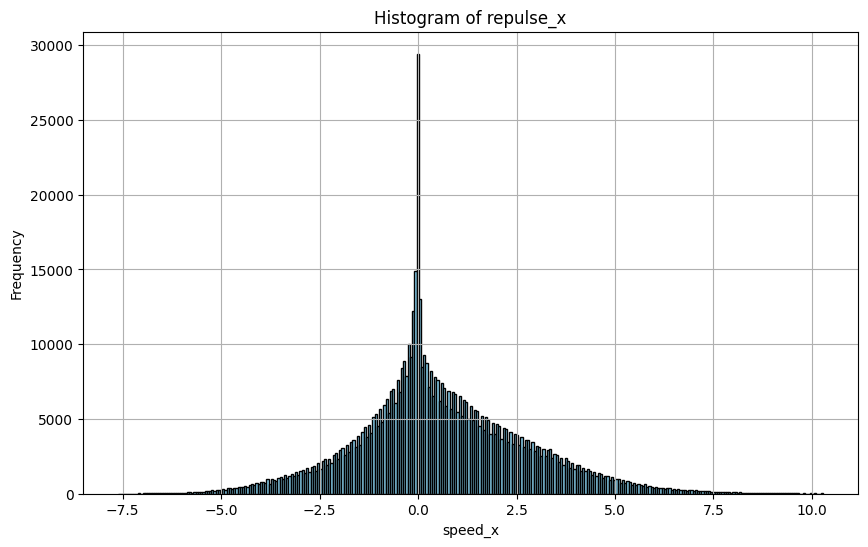

In [62]:
ballc_diff_speed_x_vals = repulsion_test['speed_x']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(ballc_diff_speed_x_vals, bins='auto', color='skyblue', edgecolor='black')
plt.title('Histogram of repulse_x')
plt.xlabel('speed_x')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [63]:
repulsion_test.sort_values(['gameId','playId','frameId'])

,gameId,playId,nflId,displayName,position,frameId,last_frame,club,possessionTeam,X_std,Y_std,o_deg_std,o_rad_std,dir_deg_std,dir_rad_std,speed_x,speed_y,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_dx,ballc_dy,ballc_diff_speed_x,ballc_diff_speed_y,dist_ballc,event,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio
22,2022090800,56,38577.0,Bobby Wagner,ILB,1,22,LA,BUF,41.750000,25.803331,265.799988,1.644100,298.329987,5.206841,0.59,-1.09,39.400002,15.043331,4.01513,1.407084,2.349998,10.760000,-0.43,-7.24,11.013632,None,Defense,0.003538,0.059578,0.059683,1.511474,16.837208
44,2022090800,56,41239.0,Aaron Donald,DT,1,22,LA,BUF,28.919998,21.723331,101.669983,4.508709,137.979980,2.408205,-2.90,2.62,39.400002,15.043331,4.01513,1.407084,-10.480003,6.680000,-3.92,-3.53,12.427907,None,Defense,0.025339,0.022818,0.034099,0.733097,0.900510
110,2022090800,56,42816.0,Troy Hill,CB,1,22,LA,BUF,47.660004,45.523331,291.670013,1.192583,12.769989,0.222878,4.25,0.96,39.400002,15.043331,4.01513,1.407084,8.260002,30.480000,3.23,-5.19,31.579393,None,Defense,-0.003237,0.005201,0.006126,-1.014104,-1.606811
132,2022090800,56,43294.0,Jalen Ramsey,CB,1,22,LA,BUF,42.050003,12.553333,130.460022,4.006228,97.500000,1.701696,-0.72,5.45,39.400002,15.043331,4.01513,1.407084,2.650002,-2.489998,-1.74,-0.70,3.636289,None,Defense,0.130872,0.052650,0.141066,0.382487,0.402299
154,2022090800,56,43298.0,Leonard Floyd,DE,1,22,LA,BUF,28.010002,19.553333,114.059998,4.292463,133.989990,2.338567,-1.29,1.34,39.400002,15.043331,4.01513,1.407084,-11.389999,4.510002,-2.31,-4.81,12.250396,None,Defense,0.015367,0.031999,0.035498,1.123074,2.082251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406908,2022091200,3826,47941.0,Michael Jackson,CB,53,53,SEA,DEN,65.660004,39.033333,93.970001,4.643099,105.419983,1.839926,-1.14,4.13,64.279999,42.373333,0.12898,5.394114,1.380005,-3.340000,-1.78,4.91,3.613864,None,Defense,0.135543,-0.373885,0.397695,-1.223007,-2.758427
1407014,2022091200,3826,52435.0,Jordyn Brooks,ILB,53,53,SEA,DEN,63.419998,43.273331,304.160004,0.974592,311.440002,5.435654,0.29,-0.33,64.279999,42.373333,0.12898,5.394114,-0.860001,0.899998,-0.35,0.45,1.244828,None,Defense,0.222280,-0.285788,0.362054,-0.909753,-1.285714
1407120,2022091200,3826,52456.0,Darrell Taylor,OLB,53,53,SEA,DEN,65.660004,43.233330,170.459961,3.308097,52.440002,0.915251,0.92,1.20,64.279999,42.373333,0.12898,5.394114,1.380005,0.859997,0.28,1.98,1.626041,None,Defense,-0.104609,-0.739736,0.747096,1.430314,7.071429
1407332,2022091200,3826,54505.0,Boye Mafe,OLB,53,53,SEA,DEN,63.349998,45.363331,235.419998,2.174331,44.039978,0.768643,0.13,0.13,64.279999,42.373333,0.12898,5.394114,-0.930000,2.989998,-0.51,0.91,3.131292,None,Defense,0.051684,-0.092220,0.105715,-1.059973,-1.784314


In [64]:
force_data_merged = data_1.merge(repulsion_test[['gameId', 'playId', 'frameId', 'nflId', 'repulse_x', 'repulse_y', 'repulse_total','indiv_F_theta','repulse_y_x_ratio']], 
                                 how='left',  # Left join to keep all rows from data_1
                                 on=['gameId', 'playId', 'frameId', 'nflId'])

In [65]:
force_data_merged['ballc_f_x_total'] = force_data_merged.groupby(['gameId','playId','frameId'])['repulse_x'].transform(np.sum)

force_data_merged['ballc_f_y_total'] = force_data_merged.groupby(['gameId','playId','frameId'])['repulse_y'].transform(np.sum)

In [66]:
force_data_merged['ballc_total_F_theta'] = np.arctan2(force_data_merged.ballc_f_y_total, force_data_merged.ballc_f_x_total)

In [67]:
force_data_merged['ballc_total_F_ratio'] = force_data_merged.ballc_f_y_total/ force_data_merged.ballc_f_x_total

In [68]:
# force_data_merged['ballc_total_F_ratio'] = force_data_merged.ballc_f_y_total/ force_data_merged.ballc_f_x_total

In [69]:
force_data_merged

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370003,27.270000,1.62,1.15,0.16,231.740005,147.899994,None,2022,1,09/08/2022,20:20:00,10,31,BUF,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1988-06-06,Indiana,G,22,True,True,35,31.629997,26.063332,231.740005,38.260010,4.044626,5.615422,147.899994,122.100006,2.581342,2.131047,3.623843,78.370003,-0.86,1.37,0.0,0.0,0.000000,39.400002,15.043331,4.015130,1.407084,1.02,6.15,0.0,0.0,0.000000,-7.770004,11.020000,13.483819,-1.88,-4.78,5.136419,34.949997,19.523331,-3.32,6.540001,7.334440,15.043331,-3.370003,False,Offense,NaN,NaN,NaN,NaN,NaN,0.202956,0.451391,1.148256,2.224084
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470001,27.129999,1.67,0.61,0.17,230.979996,148.529999,pass_arrived,2022,1,09/08/2022,20:20:00,10,31,BUF,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1988-06-06,Indiana,G,22,True,True,35,31.529999,26.203333,230.979996,39.020020,4.031362,5.602158,148.529999,121.470001,2.592338,2.120051,3.735690,78.470001,-0.87,1.42,-0.1,0.5,1.768192,39.519997,15.653332,3.913377,1.377414,1.20,6.12,1.8,-0.3,-0.165149,-7.989998,10.550001,13.234144,-2.07,-4.70,5.135650,36.849998,18.503330,-5.32,7.700003,9.359083,15.653332,-3.470001,False,Offense,NaN,NaN,NaN,NaN,NaN,0.249783,0.477046,1.088445,1.909842
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.559998,27.010000,1.57,0.49,0.15,230.979996,147.050003,None,2022,1,09/08/2022,20:20:00,10,31,BUF,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1988-06-06,Indiana,G,22,True,True,35,31.440002,26.323332,230.979996,39.020020,4.031362,5.602158,147.050003,122.950012,2.566507,2.145882,3.511996,78.559998,-0.85,1.32,0.2,-1.0,-1.373401,39.660004,16.243332,3.790157,1.319469,1.49,5.79,2.9,-3.3,-0.849825,-8.220001,10.080000,13.006722,-2.34,-4.47,5.045444,38.260002,17.743332,-6.82,8.580000,10.960328,16.243332,-3.559998,False,Offense,NaN,NaN,NaN,NaN,NaN,0.318723,0.465033,0.969952,1.459051
3,2022090800,56,35472.0,Rodger Saf

In [70]:
force_data_merged.drop_duplicates(['gameId','playId'])[20:40].gameId.to_numpy()

array([2022090800, 2022090800, 2022090800, 2022090800, 2022090800,
       2022090800, 2022090800, 2022090800, 2022090800, 2022090800,
       2022090800, 2022090800, 2022090800, 2022090800, 2022090800,
       2022090800, 2022090800, 2022090800, 2022090800, 2022090800])

In [71]:
force_data_merged.drop_duplicates(['gameId','playId'])[0:20].playId.to_numpy()

array([ 56,  80, 101, 122, 146, 167, 191, 212, 236, 299, 343, 364, 393,
       414, 438, 486, 529, 569, 593, 617], dtype=int32)

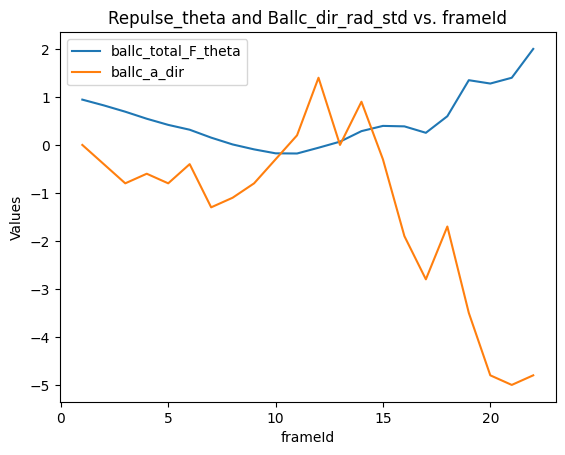

['(11:54) (Shotgun) J.Allen pass short middle to S.Diggs to LA 35 for 12 yards (L.Floyd).']
4370    22
Name: last_frame, dtype: int16


In [133]:
play_q = 'gameId == 2022090800 & playId == 167'
force_data_merged.query(play_q).drop_duplicates('frameId').plot(x='frameId', y=['ballc_total_F_theta', 'ballc_a_dir'], kind='line')
plt.title('Repulse_theta and Ballc_dir_rad_std vs. frameId')
plt.xlabel('frameId')
plt.ylabel('Values')
plt.legend(['ballc_total_F_theta', 'ballc_a_dir'])
plt.show()
print(list(data_1.query(play_q).query('frameId == 1').drop_duplicates('frameId')['playDescription']))
print(data_1.query(play_q).query('frameId == 1').drop_duplicates('frameId')['last_frame'])

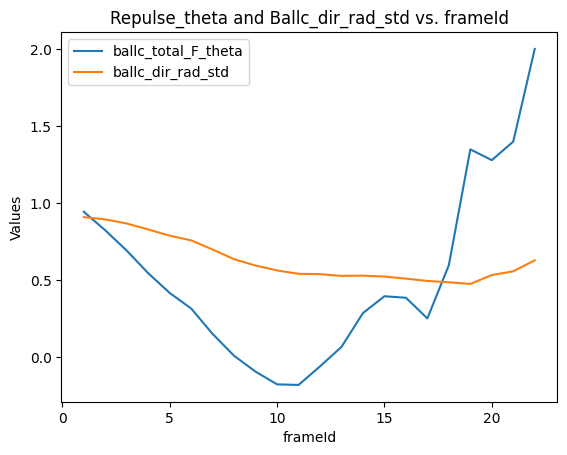

['(11:54) (Shotgun) J.Allen pass short middle to S.Diggs to LA 35 for 12 yards (L.Floyd).']
4370    22
Name: last_frame, dtype: int16


In [73]:
play_q = 'gameId == 2022090800 & playId == 167'
force_data_merged_graph = force_data_merged
force_data_merged_graph['F_theta_dir_ratio'] = force_data_merged_graph.ballc_dir_rad_std / force_data_merged_graph.ballc_total_F_theta
force_data_merged_graph['modified_dir'] = force_data_merged_graph.ballc_dir_rad_std - 2*math.pi

force_data_merged_graph.query(play_q).drop_duplicates('frameId').plot(x='frameId', y=['ballc_total_F_theta','ballc_dir_rad_std'], kind='line')
plt.title('Repulse_theta and Ballc_dir_rad_std vs. frameId')
plt.xlabel('frameId')
plt.ylabel('Values')
plt.legend(['ballc_total_F_theta', 'ballc_dir_rad_std'])
plt.show()
print(list(data_1.query(play_q).query('frameId == 1').drop_duplicates('frameId')['playDescription']))
print(data_1.query(play_q).query('frameId == 1').drop_duplicates('frameId')['last_frame'])

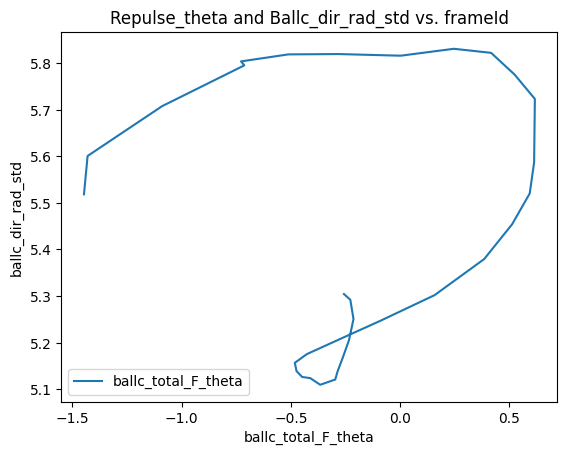

In [74]:
play_q = 'gameId == 2022090800 & playId == 122'
force_data_merged.query(play_q).drop_duplicates('frameId').plot(x='ballc_total_F_theta', y='ballc_dir_rad_std', kind='line')
plt.title('Repulse_theta and Ballc_dir_rad_std vs. frameId')
plt.xlabel('ballc_total_F_theta')
plt.ylabel('ballc_dir_rad_std')
plt.legend(['ballc_total_F_theta', 'ballc_dir_rad_std'])
plt.show()

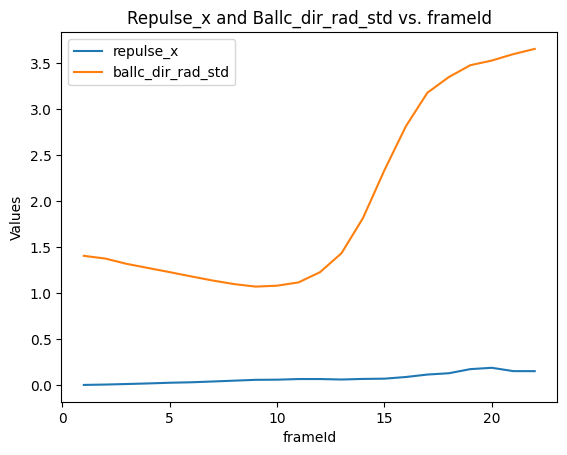

In [75]:
repulsion_test.query('gameId == 2022090800 & playId == 56 & nflId == 38577.0').plot(x='frameId', y=['repulse_x', 'ballc_dir_rad_std'], kind='line')
plt.title('Repulse_x and Ballc_dir_rad_std vs. frameId')
plt.xlabel('frameId')
plt.ylabel('Values')
plt.legend(['repulse_x', 'ballc_dir_rad_std'])
plt.show()

In [76]:
def animate_play(tracking_data, play_frame_count):
    fig, ax = plt.subplots()
    
    # Extract unique player_ids and teams
    unique_players = tracking_data['nflId'].unique()
    teams = tracking_data['club'].unique()
    
    # Set up plot for each team
    team_colors = {'BUF': 'blue', 'LA': 'red',}
    team_dots = {}
    
    for team in teams:
        team_frame_data = tracking_data[(tracking_data['club'] == team) & (tracking_data['frameId'] == 1)]
        team_dots[team], = ax.plot(team_frame_data['X_std'], team_frame_data['Y_std'],
                                   'o', color=team_colors[team], label=team)

    ax.legend(loc='upper right')
    
    def update(frame):
        ax.clear()
        
        for team in teams:
            team_frame_data = tracking_data[(tracking_data['frameId'] == frame) & (tracking_data['club'] == team)]
            team_dots[team].set_data(team_frame_data['X_std'], team_frame_data['Y_std'])

        ax.set_xlim(0, 120)
        ax.set_ylim(0, 50 / 3)
        ax.set_title(f'Frame {frame}')
    
    animation = FuncAnimation(fig, update, frames=range(1, play_frame_count + 1), repeat=False)

    # Set rc parameters for animation display in the notebook
    plt.rcParams['animation.html'] = 'jshtml'
    plt.rcParams['figure.dpi'] = 100  # Adjust the dpi as needed
    
    plt.show()

In [77]:
#'BUF': 'blue', 'LA': 'red', 'football':'brown'

In [78]:
def animate_plays_vector(tracking_data, fps=10):
    fig, ax = plt.subplots()
    play_frame_count = tracking_data.frameId.unique().max()
    
    # Extract unique player_ids and teams
    unique_players = tracking_data['nflId'].unique()
    teams = tracking_data['club'].unique()
    
    # Set up plot for each team
    team_colors = {'ATL': 'blue', 'NO': 'red', 'football':'brown'}  # Updated team labels
    team_dots = {}
    
    for team in teams:
        team_frame_data = tracking_data[(tracking_data['club'] == team) & (tracking_data['frameId'] == 1)]
        team_dots[team], = ax.plot(team_frame_data['X_std'], team_frame_data['Y_std'],
                                   'o', color=team_colors[team], label=team)

    ax.axvline(x=20, color='black', linestyle='-', linewidth=2)  # Left end zone
    ax.axvline(x=100, color='black', linestyle='-', linewidth=2)  # Right end zone

    ax.legend(loc='upper right')
    
    def update(frame):
        ax.clear()
        
        for team in teams:
            team_frame_data = tracking_data[(tracking_data['frameId'] == frame) & (tracking_data['club'] == team)]
            team_dots[team] = ax.plot(team_frame_data['X_std'], team_frame_data['Y_std'],
                                      'o', color=team_colors[team], label=team)[0]

            if team == 'NO':  # Adjust the team label for Defense
                for i, player in team_frame_data.iterrows():
                    ax.arrow(player['X_std'], player['Y_std'], player['repulse_x'] * 50, 0,
                             head_width=0.1, head_length=0.1, fc='black', ec='black', width=0.02)  # Adjusted repulse_x values

        ax.axvline(x=20, color='black', linestyle='-', linewidth=2)  # Left end zone
        ax.axvline(x=100, color='black', linestyle='-', linewidth=2)  # Right end zone

        ax.set_xlim(0, 120)
        ax.set_ylim(0, 160 / 3)  # Corrected y limit
        ax.set_title(f'Frame {frame}')
    
    interval = 1000 / fps  # Calculate the interval in milliseconds
    animation = FuncAnimation(fig, update, frames=range(1, play_frame_count + 1), repeat=False, interval=interval)

    # Display the animation using the HTML class
    html_str = animation.to_jshtml()
    display(HTML(html_str))


In [130]:
def animate_plays_vector_updated(tracking_data, fps=10):
    fig, ax = plt.subplots()
    play_frame_count = tracking_data.frameId.unique().max()

    # Extract unique player_ids and roles
    unique_players = tracking_data['nflId'].unique()
    roles = tracking_data['role_label'].unique()

    # Set up plot for each role
    role_colors = {'Offense': 'blue', 'Defense': 'red', 'Ballcarrier': 'green', 'Football': 'brown'}
    role_dots = {}
    
    for role in roles:
        role_frame_data = tracking_data[(tracking_data['role_label'] == role) & (tracking_data['frameId'] == 1)]
        role_dots[role], = ax.plot(role_frame_data['X_std'], role_frame_data['Y_std'],
                                   'o', color=role_colors[role], label=role)

    ax.axvline(x=20, color='black', linestyle='-', linewidth=2)  # Left end zone
    ax.axvline(x=100, color='black', linestyle='-', linewidth=2)  # Right end zone

    ax.legend(loc='upper right')

    def update(frame):
        ax.clear()

        for role in roles:
            role_frame_data = tracking_data[(tracking_data['frameId'] == frame) & (tracking_data['role_label'] == role)]
            role_dots[role] = ax.plot(role_frame_data['X_std'], role_frame_data['Y_std'],
                                      'o', color=role_colors[role], label=role)[0]

            if role == 'Defense':
                for i, player in role_frame_data.iterrows():
                    magnitude = player['repulse_total'] * 100  # Adjust the scaling factor as needed
                    angle = player['indiv_F_theta']  # Adjust the angle calculation
                    positive_angle = np.arctan(abs(player['repulse_y_x_ratio']))

                    dx = magnitude * np.cos(positive_angle) * np.sign(player['repulse_x'])
                    dy = magnitude * np.sin(positive_angle) * np.sign(player['repulse_y'])

                    ax.arrow(player['X_std'], player['Y_std'], dx, dy,
                             head_width=0.1, head_length=0.1, fc='black', ec='black', width=0.02)

            elif role == 'Ballcarrier':
                ballcarrier_data = role_frame_data.iloc[0]  # Assuming there's only one ball carrier in a frame
                ballcarrier_magnitude = 10  # Adjust the constant size for the ball carrier arrow
                ballcarrier_angle = ballcarrier_data['ballc_total_F_theta']

                ballcarrier_dx = ballcarrier_magnitude * np.cos(ballcarrier_angle) * -1
                ballcarrier_dy = ballcarrier_magnitude * np.sin(ballcarrier_angle) * -1
                
#                 ballcarrier_positive_angle = np.arctan(abs(player['ballc_total_F_ratio']))
#                 print(ballcarrier_positive_angle)
#                 print(ballcarrier_angle)

#                 ballcarrier_dx = ballcarrier_magnitude * np.cos(ballcarrier_positive_angle) * -1 * np.sign(ballcarrier_data['ballc_f_x_total'])
#                 ballcarrier_dy = ballcarrier_magnitude * np.sin(ballcarrier_positive_angle) * -1 * np.sign(ballcarrier_data['ballc_f_y_total'])
#                 ballcarrier_dy = ballcarrier_magnitude * np.sin(np.radians(ballcarrier_positive_angle))

                ax.arrow(ballcarrier_data['X_std'], ballcarrier_data['Y_std'], ballcarrier_dx, ballcarrier_dy,
                         head_width=0.1, head_length=0.1, fc='orange', ec='orange', width=0.02)
                
                # Second arrow based on 'ballc_dir_rad_std'
                ballcarrier_dir_angle = np.degrees(ballcarrier_data['ballc_a_dir'])  # Convert radians to degrees
                ballcarrier_dir_dx = ballcarrier_magnitude * np.cos(np.radians(ballcarrier_dir_angle))
                ballcarrier_dir_dy = ballcarrier_magnitude * np.sin(np.radians(ballcarrier_dir_angle))

                ax.arrow(ballcarrier_data['X_std'], ballcarrier_data['Y_std'], ballcarrier_dir_dx, ballcarrier_dir_dy,
                         head_width=0.1, head_length=0.1, fc='green', ec='green', width=0.02)
                

        ax.axvline(x=20, color='black', linestyle='-', linewidth=2)  # Left end zone
        ax.axvline(x=100, color='black', linestyle='-', linewidth=2)  # Right end zone

        ax.set_xlim(0, 120)
        ax.set_ylim(0, 160 / 3)
        ax.set_title(f'Frame {frame}')

    interval = 1000 / fps  # Calculate the interval in milliseconds
    animation = FuncAnimation(fig, update, frames=range(1, play_frame_count + 1), repeat=False, interval=interval)

    # Display the animation using the HTML class
    html_str = animation.to_jshtml()
    display(HTML(html_str))

In [80]:
# animate_play(data_1.query('gameId == 2022090800 & playId == 56'))

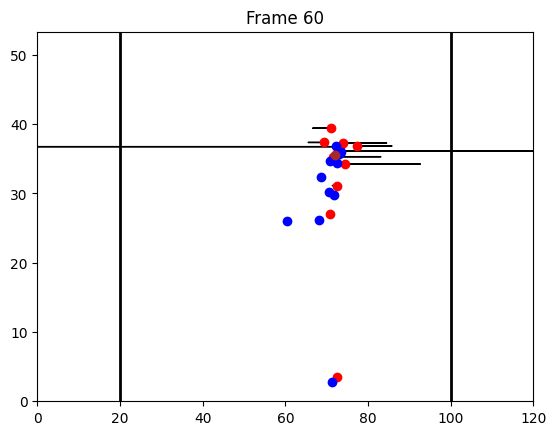

In [81]:
animate_plays_vector(force_data_merged.query('gameId == 2022091100 & playId == 935'))

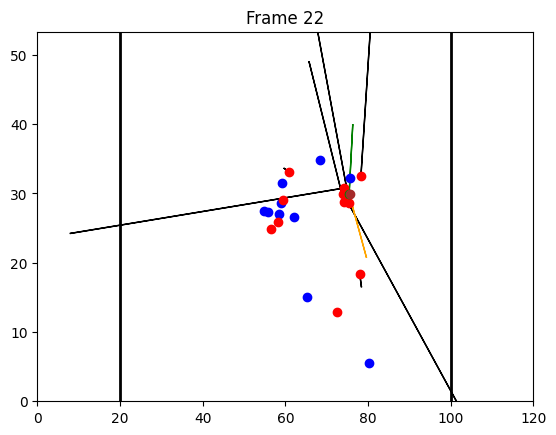

In [134]:
animate_plays_vector_updated(force_data_merged.query('gameId == 2022090800 & playId == 167'))

In [49]:
force_data_merged.query('gameId == 2022090800 & playId == 122').query('frameId == 2').sort_values('frameId')

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio,F_theta_dir_ratio,modified_dir
2324,2022090800,122,35472.0,Rodger Saffold,2,2022-09-08 20:25:51.099999,76.0,BUF,left,68.250000,31.190001,3.45,0.61,0.36,9.340000,30.709999,None,2022,1,09/08/2022,20:20:00,10,31,BUF,47857,Devin Singletary,(13:15) (Shotgun) J.Allen pass short right to ...,1,2,3,BUF,LA,BUF,45,13:15,0,0,C,-3.0,NaN,6,6,N,65,SHOTGUN,6.0,0.686939,0.384969,0.615031,-0.019032,0.019032,2.689053,0.399209,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1988-06-06,Indiana,G,33,True,True,55,51.750000,22.143332,9.340000,260.660004,0.163014,1.733810,30.709999,239.290009,0.535991,4.176398,7.717443,58.250000,-1.76,-2.97,51.269997,16.50333,3.919661,5.292187,2.25,-3.44,0.480003,5.640001,5.660390,-4.01,0.47,4.037450,48.629997,17.893333,3.120003,4.249998,5.272277,16.50333,-3.250000,False,Offense,NaN,NaN,NaN,NaN,NaN,0.662992,-0.153887,-0.228071,-0.232109,-23.204149,-0.990998
2984,2022090800,122,52536.0,Gabe Davis,2,2022-09-08 20:25:51.099999,13.0,BUF,left,49.200001,11.240000,8.55,2.04,0.86,266.799988,244.460007,None,2022,1,09/08/2022,20:20:00,10,31,BUF,47857,Devin Singletary,(13:15) (Shotgun) J.Allen pass short right to ...,1,2,3,BUF,LA,BUF,45,13:15,0,0,C,-3.0,NaN,6,6,N,65,SHOTGUN,6.0,0.686939,0.384969,0.615031,-0.019032,0.019032,2.689053,0.399209,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1999-03-01,Central Florida,WR,33,True,True,55,70.800003,42.093330,266.799988,3.200012,4.656538,6.227334,244.460007,25.539978,4.266632,0.445757,19.125837,39.199997,7.71,3.69,51.269997,16.50333,3.919661,5.292187,2.25,-3.44,19.530006,25.590000,32.191135,5.46,7.13,8.980451,48.629997,17.893333,22.170006,24.199997,32.819946,16.50333,15.800003,False,Offense,NaN,NaN,NaN,NaN,NaN,0.662992,-0.153887,-0.228071,-0.232109,-23.204149,-0.990998
2951,2022090800,122,48512.0,Ryan Bates,2,2022-09-08 20:25:51.099999,71.0,BUF,left,70.400002,31.940001,1.45,0.40,0.15,44.049999,20.580000,None,2022,1,09/08/2022,20:20:00,10,31,BUF,47857,Devin Singletary,(13:15) (Shotgun) J.Allen pass short right to ...,1,2,3,BUF,LA,BUF,45,13:15,0,0,C,-3.0,NaN,6,6,N,65,SHOTGUN,6.0,0.686939,0.384969,0.615031,-0.019032,0.019032,2.689053,0.399209,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1997-02-14,Penn State,C,33,True,True,55,49.599998,21.393332,44.049999,225.949997,0.768818,2.339614,20.580000,249.419998,0.359189,4.353200,3.243563,60.400002,-0.51,-1.36,51.269997,16.50333,3.919661,5.292187,2.25,-3.44,-1.669998,4.890001,5.167302,-2.76,2.08,3.456009,48.629997,17.893333,0.970001,3.499998,3.631926,16.50333,-5.400002,False,Offense,NaN,NaN,NaN,NaN,NaN,0.662992,-0.153887,-0.228071,-0.232109,-23.204149,-0.990998
2918,2022090800,122,48026.0,Nick Scott,2,2022-09-08 20:25:51.099999,33.0,LA

In [50]:
plays.query('gameId == 2022090800 & playId == 122')

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
6265,2022090800,122,47857,Devin Singletary,(13:15) (Shotgun) J.Allen pass short right to ...,1,2,3,BUF,LA,BUF,45,13:15,0,0,C,-3.0,NaN,6,6,N,65,SHOTGUN,6.0,0.686939,0.384969,0.615031,-0.019032,0.019032,2.689053,0.399209,NaN,NaN,NaN,NaN


In [51]:
repulsion_test['repulse_x']

22         0.003538
23         0.007414
24         0.013480
25         0.019750
26         0.027294
             ...   
1407381    0.068626
1407382    0.064632
1407383    0.062003
1407384    0.058709
1407385    0.054788
Name: repulse_x, Length: 673123, dtype: float32

In [52]:
# repulse_x_values = repulsion_test.query('gameId == 2022091100 & playId == 1088')['repulse_x']

# # Plotting the histogram
# plt.figure(figsize=(10, 6))
# plt.hist(repulse_x_values, bins='auto', color='skyblue', edgecolor='black')
# plt.title('Histogram of repulse_x')
# plt.xlabel('repulse_x')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [53]:
repulsion_test.query('frameId >5').sort_values(by = 'repulse_total', ascending = False).head(10)

,gameId,playId,nflId,displayName,position,frameId,last_frame,club,possessionTeam,X_std,Y_std,o_deg_std,o_rad_std,dir_deg_std,dir_rad_std,speed_x,speed_y,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_dx,ballc_dy,ballc_diff_speed_x,ballc_diff_speed_y,dist_ballc,event,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio
110610,2022091100,1088,53489.0,Pete Werner,OLB,40,55,NO,ATL,109.580002,25.213331,120.200012,4.185299,37.460022,0.653800,1.55,1.19,109.580002,25.213331,4.687082,0.925199,0.000000,0.000000,1.15,0.66,0.000000,None,Defense,-11500.000000,-6600.000488,13259.336914,0.521017,0.573913
686604,2022091106,657,43503.0,Elandon Roberts,ILB,18,25,MIA,NE,56.330002,33.740002,260.029999,1.744806,197.029999,3.438822,-2.71,-0.83,56.320000,33.720001,1.396787,5.388355,0.010002,0.020000,-4.55,1.46,0.022362,None,Defense,4344.497070,-1394.058350,4562.680176,-0.310500,-0.320879
1171062,2022091112,86,54487.0,Quay Walker,ILB,57,59,GB,MIN,44.730000,31.680000,252.259995,1.880418,270.589996,4.722686,0.02,-1.96,44.730000,31.670000,3.629586,5.038242,0.000000,0.010000,-0.32,-0.95,0.010000,None,Defense,799.981689,2374.945557,2506.060059,1.245891,2.968750
578362,2022091105,445,43497.0,Kamu Grugier-Hill,ILB,15,29,HOU,IND,82.430000,26.943333,100.830017,4.523370,140.609985,2.454108,-2.03,1.67,82.419998,26.913332,1.416684,5.129523,0.010002,0.030001,-2.76,3.31,0.031624,None,Defense,1593.012695,-1910.460815,2487.478516,-0.875761,-1.199275
659003,2022091105,4352,44964.0,Desmond King,CB,51,55,HOU,IND,39.959999,17.740000,224.610001,2.363001,209.820007,3.662050,-2.41,-1.38,39.939999,17.719999,6.242519,5.379803,0.020000,0.020000,-3.57,0.10,0.028285,tackle,Defense,2435.637695,-68.225151,2436.593018,-0.028004,-0.028011
433166,2022091103,2955,44842.0,T.J. Watt,OLB,36,45,PIT,CIN,46.619999,22.469999,243.559998,2.032261,42.020000,0.733387,0.82,0.74,46.619999,22.480000,5.850693,5.947907,0.000000,-0.010000,0.39,0.89,0.010000,None,Defense,-974.977661,-2224.948975,2429.193115,1.157797,2.282051
824163,2022091107,3669,46186.0,Jordan Whitehead,SS,53,63,NYJ,BAL,26.379997,6.523331,221.589996,2.415710,244.649994,4.269948,-2.00,-4.21,26.379997,6.573334,1.320691,6.182829,0.000000,-0.050003,-7.73,-3.63,0.050003,None,Defense,2147.003906,1008.230896,2371.951904,0.439032,0.469599
637834,2022091105,3293,46304.0,Zaire Franklin,OLB,39,42,IND,HOU,38.349998,23.963331,226.259995,2.334203,256.720001,4.480609,-0.62,-2.65,38.379997,23.973331,4.623377,6.158743,-0.029999,-0.010000,-3.37,-2.31,0.031622,None,Defense,1945.317261,1333.437012,2358.455811,0.600901,0.685460
639659,2022091105,3345,54502.0,Jalen Pitre,FS,58,63,HOU,IND,96.779999,22.860001,264.479980,1.667139,3.250000,0.056723,0.73,0.04,96.769997,22.870001,2.877524,0.299149,0.010002,-0.010000,-1.07,-0.51,0.014144,None,Defense,1835.575562,874.900391,2033.417969,0.444782,0.476635
777634,2022091107,1696,37778.0,Josh Bynes,ILB,43,50,BAL,NYJ,39.709999,26.830000,46.810001,5.466197,357.630005,6.241821,3.50,-0.14,39.720001,26.840000,5.922775,0.051662,-0.010002,-0.010000,1.15,-0.26,0.014144,None,Defense,-1972.814697,446.027649,2022.606934,-0.222349,-0.226087


In [136]:
force_data_merged.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x',
       ...
       'repulse_y', 'repulse_total', 'indiv_F_theta', 'repulse_y_x_ratio',
       'ballc_f_x_total', 'ballc_f_y_total', 'ballc_total_F_theta',
       'ballc_total_F_ratio', 'F_theta_dir_ratio', 'modified_dir'],
      dtype='object', length=120)

In [160]:
force_data_merged

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio,F_theta_dir_ratio,modified_dir
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370003,27.270000,1.62,1.15,0.16,231.740005,147.899994,None,2022,1,09/08/2022,20:20:00,10,31,BUF,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1988-06-06,Indiana,G,22,True,True,35,31.629997,26.063332,231.740005,38.260010,4.044626,5.615422,147.899994,122.100006,2.581342,2.131047,3.623843,78.370003,-0.86,1.37,0.0,0.0,0.000000,39.400002,15.043331,4.015130,1.407084,1.02,6.15,0.0,0.0,0.000000,-7.770004,11.020000,13.483819,-1.88,-4.78,5.136419,34.949997,19.523331,-3.32,6.540001,7.334440,15.043331,-3.370003,False,Offense,NaN,NaN,NaN,NaN,NaN,0.202956,0.451391,1.148256,2.224084,1.225410,-4.876101
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470001,27.129999,1.67,0.61,0.17,230.979996,148.529999,pass_arrived,2022,1,09/08/2022,20:20:00,10,31,BUF,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1988-06-06,Indiana,G,22,True,True,35,31.529999,26.203333,230.979996,39.020020,4.031362,5.602158,148.529999,121.470001,2.592338,2.120051,3.735690,78.470001,-0.87,1.42,-0.1,0.5,1.768192,39.519997,15.653332,3.913377,1.377414,1.20,6.12,1.8,-0.3,-0.165149,-7.989998,10.550001,13.234144,-2.07,-4.70,5.135650,36.849998,18.503330,-5.32,7.700003,9.359083,15.653332,-3.470001,False,Offense,NaN,NaN,NaN,NaN,NaN,0.249783,0.477046,1.088445,1.909842,1.265488,-4.905771
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.559998,27.010000,1.57,0.49,0.15,230.979996,147.050003,None,2022,1,09/08/2022,20:20:00,10,31,BUF,42489,Stefon Diggs,(15:00) (Shotgun) J.Allen pass short right to ...,1,1,10,BUF,LA,BUF,25,15:00,0,0,C,5.0,NaN,6,6,N,85,SHOTGUN,6.0,0.689960,0.413347,0.586653,-0.000031,0.000031,1.298699,0.004420,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1988-06-06,Indiana,G,22,True,True,35,31.440002,26.323332,230.979996,39.020020,4.031362,5.602158,147.050003,122.950012,2.566507,2.145882,3.511996,78.559998,-0.85,1.32,0.2,-1.0,-1.373401,39.660004,16.243332,3.790157,1.319469,1.49,5.79,2.9,-3.3,-0.849825,-8.220001,10.080000,13.006722,-2.34,-4.47,5.045444,38.260002,17.743332,-6.82,8.580000,10.960328,16.243332,-3.559998,False,Offense,NaN,NaN,NaN,NaN,NaN,0

In [ ]:
force_data_merged.to_parquet('Force_Data_1_8.parquet')

In [137]:
repulsion_lb_pass = force_data_merged.query('passResult == "C"')

In [139]:
agg_max = repulsion_lb_pass.query('frameId >5').sort_values(by = 'repulse_total', ascending = False).drop_duplicates(['gameId','playId','nflId'])

In [140]:
agg_max['player_avg'] = agg_max.groupby(['nflId'])['repulse_total'].transform(np.average)
agg_max['player_sum'] = agg_max.groupby(['nflId'])['repulse_total'].transform(np.sum)

In [141]:
agg_max.drop_duplicates('nflId').sort_values('player_avg', ascending = False).reset_index(drop = True)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio,F_theta_dir_ratio,modified_dir,player_avg,player_sum
0,2022091106,657,43503.0,Elandon Roberts,18,2022-09-11 13:27:45.799999,52.0,MIA,right,56.330002,33.740002,2.83,7.03,0.29,189.970001,252.970001,None,2022,1,09/11/2022,13:00:00,20,7,MIA,42437,Ty Montgomery,(2:31) (Shotgun) M.Jones pass short left to T....,1,2,13,NE,MIA,NE,41,2:31,3,0,C,4.0,NaN,7,7,N,51,SHOTGUN,7.0,0.936870,0.619834,0.380166,0.001455,-0.001455,1.039227,-0.022724,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1994-04-22,Houston,ILB,25,False,False,51,56.330002,33.740002,189.970001,260.029999,3.315602,1.744806,252.970001,197.029999,4.415159,3.438822,6.330540,53.669998,-2.71,-0.83,6.3,-6.1,-0.769271,56.320000,33.720001,1.396787,5.388355,1.84,-2.29,0.2,3.9,1.519559,0.010002,0.020000,0.022362,-4.55,1.46,4.778504,56.340000,33.830002,-0.009998,-0.090000,0.090554,33.720001,5.330002,True,Defense,4344.497070,-1394.058350,4562.680176,-0.310500,-0.320879,4347.435547,-1391.818359,-0.309836,-0.320147,-17.390974,-0.894831,470.228851,4702.288086
1,2022091105,445,43497.0,Kamu Grugier-Hill,15,2022-09-11 13:18:51.200000,51.0,HOU,left,37.570000,26.389999,2.63,4.85,0.27,169.169998,129.389999,None,2022,1,09/11/2022,13:00:00,20,20,HOU,52449,Jonathan Taylor,(5:57) (Shotgun) M.Ryan pass short middle to J...,1,3,7,IND,HOU,HOU,32,5:57,0,0,C,3.0,NaN,5,5,N,42,SHOTGUN,7.0,0.992953,0.216745,0.783255,0.004306,-0.004306,3.059311,-0.736340,None,None,NaN,NaN,0.0,1.0,0.0,0.0,1994-05-16,Eastern Illinois,ILB,29,True,False,78,82.430000,26.943333,169.169998,100.830017,2.952574,4.523370,129.389999,140.609985,2.258281,2.454108,5.883152,27.570000,-2.03,1.67,5.3,-5.1,-0.766170,82.419998,26.913332,1.416684,5.129523,0.73,-1.64,-3.3,0.0,3.141593,0.010002,0.030001,0.031624,-2.76,3.31,4.309721,82.309998,26.903332,0.120003,0.040001,0.126494,26.913332,4.430000,True,Defense,1593.012695,-1910.460815,2487.478516,-0.875761,-1.199275,1597.802002,-1910.228394,-0.874224,-1.195535,-5.867515,-1.153663,125.800468,3899.814209
2,2022091105,2345,53450.0,Kwity Paye,28,2022-09-11 14:55:17.599999,51.0,IND,right,55.580002,15.520000,4.51,2.93,0.47,115.300003,146.580002,None,2022,1,09/11/2022,13:00:00,20,20,IND,40138,Rex Burkhead,(8:56) D.Mills pass short right to R.Burkhead ...,3,1,10,HOU,IND,HOU,42,8:56,13,3,C,-3.0,NaN,5,5,N,52,I_FORM,6.0,0.407073,0.822709,0.177291,0.012801,-0.012801,2.731344,0.070780,None,None,NaN,NaN,1.0,0.0,0.0,0.0,None,Michigan,DE,36,False,False,52,55.580002,15.520000,115.300003,334.700012,2.012365,0.441568,146.580002,303.419983,2.558304,5.295678,10.088600,54.419998,2.48,-3.76,-2.4,-0.5,-2.936197,55.560001,15.510000,0.700226,5.

In [57]:
agg_max.position.unique()

array(['OLB', 'ILB', 'CB', 'SS', 'FS', 'DE', 'MLB', 'DT', 'NT', None,
       'DB'], dtype=object)

In [142]:
agg_max.drop_duplicates('nflId').sort_values('player_avg', ascending = False).query('player_sum >= 200').reset_index(drop = True)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio,F_theta_dir_ratio,modified_dir,player_avg,player_sum
0,2022091106,657,43503.0,Elandon Roberts,18,2022-09-11 13:27:45.799999,52.0,MIA,right,56.330002,33.740002,2.83,7.03,0.29,189.970001,252.970001,None,2022,1,09/11/2022,13:00:00,20,7,MIA,42437,Ty Montgomery,(2:31) (Shotgun) M.Jones pass short left to T....,1,2,13,NE,MIA,NE,41,2:31,3,0,C,4.0,NaN,7,7,N,51,SHOTGUN,7.0,0.936870,0.619834,0.380166,0.001455,-0.001455,1.039227,-0.022724,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1994-04-22,Houston,ILB,25,False,False,51,56.330002,33.740002,189.970001,260.029999,3.315602,1.744806,252.970001,197.029999,4.415159,3.438822,6.330540,53.669998,-2.71,-0.83,6.3,-6.1,-0.769271,56.320000,33.720001,1.396787,5.388355,1.84,-2.29,0.2,3.9,1.519559,0.010002,0.020000,0.022362,-4.55,1.46,4.778504,56.340000,33.830002,-0.009998,-0.090000,0.090554,33.720001,5.330002,True,Defense,4344.497070,-1394.058350,4562.680176,-0.310500,-0.320879,4347.435547,-1391.818359,-0.309836,-0.320147,-17.390974,-0.894831,470.228851,4702.288086
1,2022091105,445,43497.0,Kamu Grugier-Hill,15,2022-09-11 13:18:51.200000,51.0,HOU,left,37.570000,26.389999,2.63,4.85,0.27,169.169998,129.389999,None,2022,1,09/11/2022,13:00:00,20,20,HOU,52449,Jonathan Taylor,(5:57) (Shotgun) M.Ryan pass short middle to J...,1,3,7,IND,HOU,HOU,32,5:57,0,0,C,3.0,NaN,5,5,N,42,SHOTGUN,7.0,0.992953,0.216745,0.783255,0.004306,-0.004306,3.059311,-0.736340,None,None,NaN,NaN,0.0,1.0,0.0,0.0,1994-05-16,Eastern Illinois,ILB,29,True,False,78,82.430000,26.943333,169.169998,100.830017,2.952574,4.523370,129.389999,140.609985,2.258281,2.454108,5.883152,27.570000,-2.03,1.67,5.3,-5.1,-0.766170,82.419998,26.913332,1.416684,5.129523,0.73,-1.64,-3.3,0.0,3.141593,0.010002,0.030001,0.031624,-2.76,3.31,4.309721,82.309998,26.903332,0.120003,0.040001,0.126494,26.913332,4.430000,True,Defense,1593.012695,-1910.460815,2487.478516,-0.875761,-1.199275,1597.802002,-1910.228394,-0.874224,-1.195535,-5.867515,-1.153663,125.800468,3899.814209
2,2022091105,2345,53450.0,Kwity Paye,28,2022-09-11 14:55:17.599999,51.0,IND,right,55.580002,15.520000,4.51,2.93,0.47,115.300003,146.580002,None,2022,1,09/11/2022,13:00:00,20,20,IND,40138,Rex Burkhead,(8:56) D.Mills pass short right to R.Burkhead ...,3,1,10,HOU,IND,HOU,42,8:56,13,3,C,-3.0,NaN,5,5,N,52,I_FORM,6.0,0.407073,0.822709,0.177291,0.012801,-0.012801,2.731344,0.070780,None,None,NaN,NaN,1.0,0.0,0.0,0.0,None,Michigan,DE,36,False,False,52,55.580002,15.520000,115.300003,334.700012,2.012365,0.441568,146.580002,303.419983,2.558304,5.295678,10.088600,54.419998,2.48,-3.76,-2.4,-0.5,-2.936197,55.560001,15.510000,0.700226,5.

In [148]:
#Defensive End Rankings
agg_max.query('position == "DE"').drop_duplicates('nflId').sort_values('player_avg', ascending = False).reset_index(drop = True)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio,F_theta_dir_ratio,modified_dir,player_avg,player_sum
0,2022091105,2345,53450.0,Kwity Paye,28,2022-09-11 14:55:17.599999,51.0,IND,right,55.580002,15.520000,4.51,2.93,0.47,115.300003,146.580002,None,2022,1,09/11/2022,13:00:00,20,20,IND,40138,Rex Burkhead,(8:56) D.Mills pass short right to R.Burkhead ...,3,1,10,HOU,IND,HOU,42,8:56,13,3,C,-3.0,NaN,5,5,N,52,I_FORM,6.0,0.407073,0.822709,0.177291,0.012801,-0.012801,2.731344,0.070780,None,None,NaN,NaN,1.0,0.0,0.0,0.0,None,Michigan,DE,36,False,False,52,55.580002,15.520000,115.300003,334.700012,2.012365,0.441568,146.580002,303.419983,2.558304,5.295678,10.088600,54.419998,2.48,-3.76,-2.4,-0.5,-2.936197,55.560001,15.510000,0.700226,5.598842,2.49,-2.04,-0.6,-1.1,-2.070143,0.020000,0.010000,0.022361,-0.01,-1.72,1.720029,55.639999,15.460000,-0.059998,0.060000,0.084851,15.510000,3.580002,True,Defense,9.548849,1642.402100,1642.429688,1.564982,172.000000,11.212818,1640.839111,1.563963,146.336014,3.579907,-0.684344,102.675186,1642.802979
1,2022091107,2635,54491.0,Jermaine Johnson,46,2022-09-11 15:15:17.500000,52.0,NYJ,right,35.770000,20.120001,0.53,2.18,0.05,196.410004,204.740005,None,2022,1,09/11/2022,13:00:00,9,24,NYJ,46155,Mark Andrews,(4:34) (Shotgun) L.Jackson pass short right to...,3,2,10,BAL,NYJ,BAL,12,4:34,3,17,C,10.0,NaN,15,15,N,22,EMPTY,5.0,0.443502,0.054881,0.945119,-0.011631,0.011631,-0.239744,1.572865,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,Florida State,DE,48,False,False,22,35.770000,20.120001,196.410004,253.589996,3.428001,1.857205,204.740005,245.259995,3.573387,4.280594,1.185578,74.229996,-0.22,-0.48,-2.0,0.2,3.041924,35.730000,20.120001,4.463505,2.015681,-0.23,0.48,0.8,0.2,0.244979,0.040001,0.000000,0.040001,0.01,-0.96,0.960052,36.009998,19.549999,-0.239998,0.570002,0.618466,20.120001,13.770000,True,Defense,-3.999854,383.985931,384.006775,-1.560380,-95.999992,-3.449553,394.967896,1.579530,-114.498268,1.276127,-4.267505,64.016029,384.096191
2,2022091104,689,54467.0,Aidan Hutchinson,27,2022-09-11 13:31:37.299999,97.0,DET,right,31.900000,29.330000,5.81,2.60,0.59,107.980003,79.779999,None,2022,1,09/11/2022,13:00:00,35,38,DET,47834,A.J. Brown,(5:51) (Shotgun) J.Hurts pass short middle to ...,1,1,15,PHI,DET,PHI,13,5:51,7,0,C,0.0,NaN,10,10,N,23,PISTOL,6.0,0.652353,0.580186,0.419814,-0.020043,0.020043,-0.162443,0.912367,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,Michigan,DE,32,False,False,23,31.900000,29.330000,107.980003,342.019989,1.884607,0.313810,79.779999,10.220001,1.392424,0.178373,12.996621,78.099998,5.72,1.03,-2.3,0.5,2.927532,31.969999,29.330000,4.160865,0.606851,2.78,1.93,-3.8,-2.1,-2.636

In [147]:
#Defensive Tackle Rankings
agg_max.query('position == "DT"').drop_duplicates('nflId').sort_values('player_avg', ascending = False).reset_index(drop = True)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio,F_theta_dir_ratio,modified_dir,player_avg,player_sum
0,2022091110,2287,47867.0,Khalen Saunders,36,2022-09-11 18:08:00.900000,99.0,KC,left,73.430000,33.450001,5.22,3.23,0.53,266.779999,259.970001,None,2022,1,09/11/2022,16:25:00,21,44,KC,48646,Greg Dortch,"(14:19) (No Huddle, Shotgun) K.Murray pass sho...",3,2,9,ARI,KC,ARI,27,14:19,7,23,C,2.0,NaN,10,10,N,83,EMPTY,4.0,0.735972,0.042644,0.957356,0.011647,-0.011647,0.717479,1.369632,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1996-08-09,Western Illinois,DT,38,True,False,37,46.570000,19.883331,266.779999,3.220001,4.656189,6.226985,259.970001,10.029999,4.537333,0.175057,11.676826,63.430000,5.14,0.91,-2.8,-1.8,-2.570255,46.459999,19.783333,5.265309,0.082554,2.53,0.21,-5.3,-0.7,-3.010277,0.110001,0.099998,0.148660,2.61,0.70,2.702240,46.339996,20.053333,0.230003,-0.170002,0.286011,19.783333,9.570000,True,Defense,-103.682365,-27.807531,107.346596,0.262033,0.268199,-103.200371,-27.677711,-2.879565,0.268194,-0.028669,-6.200631,23.478695,117.393471
1,2022091107,2219,52479.0,Justin Madubuike,28,2022-09-11 14:54:24.000000,92.0,BAL,left,95.660004,36.169998,5.34,3.84,0.54,322.549988,321.109985,None,2022,1,09/11/2022,13:00:00,9,24,BAL,53536,Michael Carter,(11:56) (Shotgun) J.Flacco pass short right to...,3,2,15,NYJ,BAL,NYJ,15,11:56,3,10,C,-6.0,NaN,0,0,N,95,SHOTGUN,6.0,0.710944,0.192987,0.807013,-0.027991,0.027991,-0.570410,-1.054735,None,None,NaN,NaN,1.0,0.0,0.0,0.0,1997-11-17,Texas A&amp;M,DT,33,True,False,25,24.339996,17.163334,322.549988,307.450012,5.629560,0.917170,321.109985,308.890015,5.604426,5.391148,11.945260,85.660004,3.35,-4.16,-2.4,3.5,2.171870,24.370003,17.243332,5.219058,5.775644,3.60,-2.00,-1.4,-4.0,-1.907471,-0.030006,-0.079998,0.085440,-0.25,-2.16,2.174419,24.529999,17.253330,-0.190002,-0.089996,0.210239,17.243332,-0.660004,True,Defense,27.445757,237.131363,238.714371,1.455568,8.640001,28.076256,236.278519,1.452524,8.415599,3.976281,-0.507541,14.142088,240.415497
2,2022091104,3434,43378.0,Javon Hargrave,23,2022-09-11 15:39:21.299999,97.0,PHI,left,31.580000,5.410000,3.51,4.45,0.37,221.279999,241.169998,None,2022,1,09/11/2022,13:00:00,35,38,PHI,52443,D'Andre Swift,(15:00) J.Goff pass short left to D.Swift push...,4,1,10,DET,PHI,PHI,26,15:00,21,38,C,-7.0,NaN,25,25,N,36,SINGLEBACK,6.0,0.703012,0.041254,0.958746,0.015083,-0.015083,4.126110,2.184944,None,None,NaN,NaN,0.0,0.0,0.0,1.0,1993-02-07,South Carolina State,DT,67,True,False,84,88.419998,47.923332,221.279999,48.720001,3.862065,5.432861,241.169998,28.830017,4.209210,0.503178,7.851659,21.580002,3.07,1.69,-4.8,-0.3,-3.079174,88.330002,47.993332,5.9

In [149]:
#OLB Rankings
agg_max.query('position == "OLB"').drop_duplicates('nflId').sort_values('player_avg', ascending = False).reset_index(drop = True)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio,F_theta_dir_ratio,modified_dir,player_avg,player_sum
0,2022091200,1057,53668.0,Jonathon Cooper,17,2022-09-12 20:59:10.700000,53.0,DEN,left,80.169998,49.790001,0.52,3.46,0.05,319.420013,320.720001,None,2022,1,09/12/2022,20:15:00,17,16,DEN,53485,D'Wayne Eskridge,(11:28) (Shotgun) G.Smith pass short right to ...,2,1,10,SEA,DEN,SEA,31,11:28,7,3,C,-5.0,15.0,0,15,N,79,SHOTGUN,5.0,0.500410,0.522841,0.477159,0.046250,-0.046250,1.492996,0.930739,Taunting,None,53668.0,NaN,1.0,0.0,0.0,0.0,None,Ohio State,OLB,26,True,False,41,39.830002,3.543331,319.420013,310.579987,5.574931,0.862542,320.720001,309.279999,5.597620,5.397954,1.163209,70.169998,0.33,-0.40,3.2,0.4,0.124355,39.900002,3.553333,5.577898,6.143908,3.13,-0.44,-3.3,0.2,3.081061,-0.070000,-0.010002,0.070711,-2.80,0.04,2.800286,39.839996,3.433331,-0.009995,0.110001,0.110454,3.553333,-1.169998,True,Defense,429.829376,-6.140419,429.873230,-0.014285,-0.014286,430.149475,-5.918844,-0.013759,-0.013760,-446.534088,-0.139277,86.008087,430.040405
1,2022091107,1075,52506.0,Malik Harrison,32,2022-09-11 13:51:46.799999,40.0,BAL,right,65.440002,40.189999,2.57,5.08,0.28,286.519989,323.769989,None,2022,1,09/11/2022,13:00:00,9,24,BAL,53536,Michael Carter,"(14:18) (No Huddle, Shotgun) J.Flacco pass sho...",2,1,10,NYJ,BAL,NYJ,44,14:18,0,3,C,3.0,NaN,11,11,N,54,SHOTGUN,7.0,0.533096,0.401529,0.598471,0.001316,-0.001316,2.747688,0.527041,None,None,NaN,NaN,0.0,1.0,0.0,0.0,1998-03-05,Ohio State,OLB,58,False,False,54,65.440002,40.189999,286.519989,163.480011,5.000717,3.429921,323.769989,126.230011,5.650852,2.203129,5.748936,44.559998,-1.52,2.07,0.3,-5.8,-1.519118,65.400002,40.270000,6.193126,4.260872,-0.24,-0.50,-1.3,1.2,2.396173,0.040001,-0.080002,0.089445,-1.28,2.57,2.871115,65.449997,40.180000,-0.009995,0.009998,0.014137,40.270000,11.440002,True,Defense,129.433334,-259.877869,290.326538,-1.108706,-2.007812,128.490982,-255.976501,-1.105579,-1.992175,-3.853974,-2.022313,29.491322,294.913177
2,2022091105,643,41361.0,Kevin Pierre-Louis,30,2022-09-11 13:29:25.799999,57.0,HOU,left,48.389999,11.280000,1.59,4.44,0.18,5.490000,313.369995,None,2022,1,09/11/2022,13:00:00,20,20,HOU,53658,Mike Strachan,(3:01) M.Ryan pass short left to M.Strachan to...,1,1,10,IND,HOU,IND,41,3:01,0,3,C,13.0,NaN,20,20,N,69,SINGLEBACK,7.0,0.447263,0.161349,0.838651,-0.013799,0.013799,2.282617,1.285213,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1991-10-07,Boston College,OLB,30,True,False,51,71.610001,42.053333,5.490000,264.510010,0.095819,1.666615,313.369995,316.630005,5.469338,5.526236,3.556735,38.389999,1.16,-1.09,-4.2,2.3,2.640579,71.529999,41.983330,5

In [150]:
#CB Rankings
agg_max.query('position == "CB"').drop_duplicates('nflId').sort_values('player_avg', ascending = False).reset_index(drop = True)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio,F_theta_dir_ratio,modified_dir,player_avg,player_sum
0,2022091103,3147,44872.0,Chidobe Awuzie,16,2022-09-11 15:34:49.400000,22.0,CIN,left,71.330002,52.110001,2.21,3.23,0.24,101.220001,39.799999,None,2022,1,09/11/2022,13:00:00,20,23,CIN,54517,George Pickens,(7:03) (Shotgun) M.Trubisky pass short right t...,4,2,7,PIT,CIN,PIT,37,7:03,14,20,C,3.0,NaN,3,3,N,73,PISTOL,6.0,0.645642,0.149620,0.850380,0.002813,-0.002813,1.469920,-0.450886,None,None,NaN,NaN,1.0,0.0,0.0,0.0,1995-05-24,Colorado,CB,16,True,False,47,48.669998,1.223331,101.220001,168.780029,1.766622,3.337419,39.799999,230.199997,0.694641,4.017748,4.943637,61.330002,-1.41,-1.70,1.6,4.0,1.190290,48.660004,1.203331,1.947089,3.973417,-2.27,-2.49,-0.8,-3.3,-1.808632,0.009995,0.020000,0.022359,0.86,0.79,1.167776,48.480003,1.363331,0.189995,-0.139999,0.236004,1.203331,1.669998,True,Defense,-821.330872,-754.478394,1115.267578,0.742999,0.918605,-821.370239,-754.412903,-2.398660,0.918481,-1.656515,-2.309769,78.095886,1483.821777
1,2022091110,1232,53565.0,Marco Wilson,14,2022-09-11 17:11:15.599999,20.0,ARI,right,95.029999,33.410000,4.62,2.71,0.48,100.360001,172.910004,None,2022,1,09/11/2022,16:25:00,21,44,ARI,44874,JuJu Smith-Schuster,(9:48) (Shotgun) P.Mahomes pass short left to ...,2,2,3,KC,ARI,ARI,19,9:48,7,14,C,3.0,NaN,7,7,N,91,SHOTGUN,7.0,0.346149,0.122774,0.877226,-0.004432,0.004432,4.390357,0.483164,None,None,NaN,NaN,1.0,0.0,0.0,0.0,None,Florida,CB,74,False,False,91,95.029999,33.410000,100.360001,349.640015,1.751612,0.180816,172.910004,277.089996,3.017849,4.836133,10.334662,14.970001,0.57,-4.58,0.9,3.0,1.279340,95.010002,33.410000,0.301244,5.034577,1.23,-3.68,-1.4,2.0,2.181522,0.019997,0.000000,0.019997,-0.66,-0.90,1.116065,94.550003,38.169998,0.479996,-4.759998,4.784138,33.410000,4.029999,True,Defense,733.497498,1000.223816,1240.349243,0.938047,1.363636,733.502563,999.809143,0.937846,1.363062,5.368232,-1.248608,60.111595,1683.124756
2,2022091100,3578,52424.0,A.J. Terrell,14,2022-09-11 15:44:20.599999,24.0,ATL,right,81.680000,23.469999,5.28,3.72,0.53,325.450012,3.980000,tackle,2022,1,09/11/2022,13:00:00,26,27,ATL,43336,Michael Thomas,"(4:53) (No Huddle, Shotgun) J.Winston pass dee...",4,2,20,NO,ATL,ATL,48,4:53,26,18,C,18.0,NaN,20,20,N,62,SHOTGUN,6.0,0.950015,0.832599,0.167401,-0.072581,0.072581,1.853674,2.015830,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1998-09-23,Clemson,CB,18,False,False,62,81.680000,23.469999,325.450012,124.549988,5.680174,4.109378,3.980000,86.019997,0.069464,1.501332,11.811044,28.320000,0.37,5.27,3.9,-3.7,-0.759088,81.650002,23.520000,2.182185,0.868127,1.58,1.87,-2.5,-3.2,

In [151]:
#FS Rankings
agg_max.query('position == "FS"').drop_duplicates('nflId').sort_values('player_avg', ascending = False).reset_index(drop = True)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio,F_theta_dir_ratio,modified_dir,player_avg,player_sum
0,2022091107,2866,44854.0,Marcus Williams,8,2022-09-11 15:23:04.000000,32.0,BAL,left,61.930000,20.280001,4.74,2.84,0.48,121.879997,86.279999,first_contact,2022,1,09/11/2022,13:00:00,9,24,BAL,44817,Corey Davis,(:33) (Shotgun) J.Flacco pass short middle to ...,3,2,10,NYJ,BAL,NYJ,36,0:33,3,24,C,12.0,NaN,12,12,N,74,SHOTGUN,6.0,0.802266,0.012211,0.987789,5.438579e-03,-5.438579e-03,1.435198,1.214659,None,None,NaN,NaN,1.0,0.0,0.0,0.0,1996-09-08,Utah,FS,17,True,False,46,58.070000,33.053329,121.879997,148.119995,2.127207,3.698004,86.279999,183.720001,1.505870,3.206519,10.603095,51.930000,-4.73,-0.31,3.8,1.6,0.398522,58.090000,33.153332,2.467372,1.695413,-0.47,3.72,-4.0,-6.4,-2.129396,-0.020000,-0.100002,0.101983,-4.26,-4.03,5.864171,57.799999,33.343330,0.270000,-0.290001,0.396233,33.153332,12.070000,True,Defense,339.709442,321.368317,467.632446,0.757661,0.946009,345.835266,311.108551,0.732586,0.899586,2.314284,-4.587772,30.792936,1046.959839
1,2022091113,2470,44827.0,Malik Hooker,27,2022-09-11 22:17:20.000000,28.0,DAL,right,83.089996,17.299999,4.81,3.12,0.49,293.690002,251.470001,None,2022,1,09/11/2022,20:20:00,3,19,DAL,41233,Mike Evans,(5:19) (Shotgun) T.Brady pass short right to M...,3,3,3,TB,DAL,DAL,35,5:19,3,12,C,9.0,NaN,10,10,N,75,SHOTGUN,7.0,0.888260,0.112685,0.887315,-9.505559e-03,9.505559e-03,3.143382,1.316085,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1996-04-02,Ohio State,FS,32,False,False,75,83.089996,17.299999,293.690002,156.309998,5.125857,3.555061,251.470001,198.529999,4.388979,3.465002,10.759682,26.910004,-4.56,-1.53,2.6,-1.8,-0.605545,83.040001,17.370001,2.075720,3.562042,-2.62,-1.17,-1.5,-1.0,-2.553590,0.049995,-0.070002,0.086022,-1.94,-0.36,1.973119,82.879997,17.350000,0.209999,-0.050001,0.215870,17.370001,8.089996,True,Defense,210.407471,39.044685,213.999512,0.183480,0.185567,213.132248,43.657333,0.202042,0.204837,17.630209,-2.721143,28.434551,369.649170
2,2022091103,1565,46080.0,Minkah Fitzpatrick,33,2022-09-11 14:11:07.400000,39.0,PIT,right,65.070000,19.480000,2.61,0.78,0.26,59.759998,254.100006,None,2022,1,09/11/2022,13:00:00,20,23,PIT,53434,Ja'Marr Chase,(4:01) J.Burrow pass short middle to J.Chase t...,2,1,10,CIN,PIT,CIN,35,4:01,3,17,C,11.0,NaN,21,21,N,45,SINGLEBACK,6.0,0.630440,0.317865,0.682135,2.153863e-02,-2.153863e-02,1.632598,1.249305,None,None,NaN,NaN,1.0,0.0,0.0,0.0,1996-11-17,Alabama,FS,44,False,False,45,65.070000,19.480000,59.759998,30.240002,1.043009,5.755398,254.100006,195.899994,4.434882,3.419100,5.838413,44.930000,-2.51,-0.72,-0.3,-0.2,-2.553590,65.010002,19.389

In [152]:
#SS Rankings
agg_max.query('position == "SS"').drop_duplicates('nflId').sort_values('player_avg', ascending = False).reset_index(drop = True)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio,F_theta_dir_ratio,modified_dir,player_avg,player_sum
0,2022091111,3295,48581.0,Roderic Teamer,27,2022-09-11 19:02:58.099999,33.0,LV,right,39.270000,8.330000,2.42,1.83,0.24,58.369999,66.440002,None,2022,1,09/11/2022,16:25:00,24,19,LV,44819,Mike Williams,(4:32) J.Herbert pass short right to M.William...,4,1,10,LAC,LV,LAC,25,4:32,24,19,C,-2.0,NaN,4,4,N,35,SINGLEBACK,7.0,0.336241,0.884307,0.115693,-0.010173,0.010173,0.986576,-0.222521,None,None,NaN,NaN,0.0,1.0,0.0,0.0,1997-05-12,Tulane,SS,32,False,False,35,39.270000,8.330000,58.369999,31.630001,1.018749,5.731138,66.440002,23.559998,1.159597,0.411200,5.413395,70.729996,2.22,0.97,-2.7,1.2,2.723368,39.320000,8.360000,3.098134,5.933072,1.57,-0.57,-2.8,-0.1,-3.105894,-0.049999,-0.030000,0.058309,0.65,1.54,1.671556,37.939999,8.520000,1.330002,-0.190001,1.343505,8.360000,4.270000,True,Defense,-139.303162,-330.041321,358.235474,1.171403,2.369231,-139.216202,-328.743713,-1.971378,2.361390,-3.009606,-0.350113,58.383156,408.682068
1,2022091108,1167,47891.0,Julian Love,10,2022-09-11 17:16:45.099999,20.0,NYG,right,99.449997,-2.420000,7.98,3.50,0.82,222.160004,198.830002,None,2022,1,09/11/2022,16:25:00,20,21,NYG,45280,Cody Hollister,(9:11) R.Tannehill pass deep right to C.Hollis...,2,1,10,TEN,NYG,NYG,33,9:11,10,0,C,22.0,NaN,22,22,N,77,I_FORM,7.0,0.214401,0.876246,0.123754,0.024604,-0.024604,3.929702,1.106240,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1998-03-19,Notre Dame,SS,11,False,False,77,99.449997,-2.420000,222.160004,227.839996,3.877424,2.306627,198.830002,251.169998,3.470238,4.383743,17.850780,10.550003,-2.58,-7.55,1.6,3.1,1.094329,99.430000,-2.320000,2.367888,4.674341,-0.16,-4.19,-1.2,3.6,1.892547,0.019997,-0.100000,0.101980,-2.42,-3.36,4.140773,99.610001,-1.980000,-0.160004,-0.440000,0.468189,-2.320000,22.449997,True,Defense,192.990280,267.953430,330.218536,0.946616,1.388430,192.947800,267.923981,0.946669,1.388583,4.937673,-1.608845,35.822128,716.442566
2,2022091102,2532,53609.0,Talanoa Hufanga,10,2022-09-11 14:56:11.200000,29.0,SF,right,43.020000,18.549999,2.05,7.50,0.25,110.889999,321.429993,None,2022,1,09/11/2022,13:00:00,19,10,SF,47856,David Montgomery,(7:38) (Shotgun) J.Fields pass short middle to...,3,2,7,CHI,SF,CHI,31,7:38,0,10,C,1.0,NaN,3,3,N,41,SHOTGUN,8.0,0.437305,0.139195,0.860805,-0.008534,0.008534,1.171856,-0.571845,None,None,NaN,NaN,0.0,1.0,0.0,0.0,None,Southern California,SS,21,False,False,41,43.020000,18.549999,110.889999,339.109985,1.935396,0.364599,321.429993,128.570007,5.610012,2.243970,4.585727,66.979996,-1.28,1.60,2.4,-8.2,-1.286066,43.200001,18.490000,3.804469,5.514368,2.06,-1.99

In [153]:
#MLB Rankings
agg_max.query('position == "MLB"').drop_duplicates('nflId').sort_values('player_avg', ascending = False).reset_index(drop = True)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,season,week,gameDate,gameTimeEastern,homeFinalScore,visitorFinalScore,PlayerTeam,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,tackle,assist,forcedFumble,pff_missedTackle,birthDate,collegeName,position,last_frame,ToLeft,onOffense,absoluteYardlineNumber_std,X_std,Y_std,o_deg,o_deg_std,o_rad,o_rad_std,dir_deg,dir_deg_std,dir_rad,dir_rad_std,MPH,end_distance,speed_x,speed_y,a_x,a_y,a_dir,ballc_X,ballc_Y,ballc_o_rad_std,ballc_dir_rad_std,ballc_speed_x,ballc_speed_y,ballc_a_x,ballc_a_dir,ballc_a_y,ballc_dx,ballc_dy,dist_ballc,ballc_diff_speed_x,ballc_diff_speed_y,ballc_diff_speed_total,football_X,football_Y,ball_dx,ball_dy,dist_ball,dist_side_top_ballc,dist_los,onDefense,role_label,repulse_x,repulse_y,repulse_total,indiv_F_theta,repulse_y_x_ratio,ballc_f_x_total,ballc_f_y_total,ballc_total_F_theta,ballc_total_F_ratio,F_theta_dir_ratio,modified_dir,player_avg,player_sum
0,2022091200,3747,47871.0,Cody Barton,13,2022-09-12 23:03:03.200000,57.0,SEA,left,66.180000,39.000000,5.29,2.69,0.54,134.389999,52.980000,None,2022,1,09/12/2022,20:15:00,17,16,SEA,53464,Javonte Williams,(1:24) (Shotgun) R.Wilson pass short right to ...,4,1,10,DEN,SEA,DEN,49,1:24,17,16,C,-3.0,NaN,-4,-4,N,61,SHOTGUN,6.0,0.940139,0.346011,0.653989,0.099991,-0.099991,2.391123,-1.015721,None,None,NaN,NaN,1.0,0.0,0.0,0.0,1996-11-13,Utah,MLB,23,True,False,59,53.820000,14.333332,134.389999,135.609985,2.345548,3.916344,52.980000,217.020004,0.924675,3.787714,11.833412,56.180000,-4.22,-3.19,2.9,1.0,0.332059,53.820000,14.353333,1.191362,3.947237,-3.97,-4.13,-2.4,0.5,2.936197,0.000000,-0.020000,0.020000,-0.25,0.94,0.972677,53.820000,14.153332,0.000000,0.180000,0.180000,14.353333,-5.180000,True,Defense,277.769318,-1044.412598,1080.718872,-1.310856,-3.760000,277.261749,-1044.409912,-1.311309,-3.766873,-3.010149,-2.335949,69.782829,1674.787964
1,2022091101,2951,52505.0,Jacob Phillips,19,2022-09-11 15:22:48.599999,50.0,CLE,left,76.199997,46.099998,7.75,2.10,0.80,353.230011,4.900000,None,2022,1,09/11/2022,13:00:00,24,26,CLE,46170,Ian Thomas,(1:14) (Shotgun) B.Mayfield pass short right t...,3,3,2,CAR,CLE,CAR,33,1:14,7,20,C,2.0,NaN,3,3,N,77,SHOTGUN,7.0,0.783284,0.107375,0.892625,0.015363,-0.015363,0.748883,1.140438,None,None,NaN,NaN,1.0,0.0,0.0,0.0,1999-04-01,Louisiana State,MLB,30,True,False,43,43.800003,7.233334,353.230011,276.769989,6.165027,1.452638,4.900000,265.100006,0.085521,4.626868,17.336285,66.199997,-0.66,-7.72,1.7,1.9,0.840897,43.919998,7.093330,0.383274,5.157623,2.42,-5.06,-0.7,0.6,2.432966,-0.119995,0.140003,0.184390,-3.08,-2.66,4.069643,43.860001,7.133331,-0.059998,0.100002,0.116620,7.093330,0.800003,True,Defense,81.508369,70.393593,107.698067,0.712358,0.863636,87.866989,70.291039,0.674723,0.799971,7.644057,-1.125562,28.524271,114.097084
2,2022091101,3263,42470.0,Damien Wilson,23,2022-09-11 15:36:32.599999,57.0,CAR,left,60.160000,45.490002,6.66,4.90,0.66,355.500000,323.859985,None,2022,1,09/11/2022,13:00:00,24,26,CAR,53520,Anthony Schwartz,(11:31) (Shotgun) J.Brissett pass short right ...,4,3,4,CLE,CAR,CLE,31,11:31,14,20,C,14.0,NaN,19,19,N,79,SHOTGUN,6.0,0.964124,0.215285,0.784715,-0.070027,0.070027,0.330620,2.414298,None,None,NaN,NaN,1.0,0.0,0.0,0.0,1993-05-28,Minnesota,MLB,28,True,False,41,59.840000,7.843330,355.500000,274.500000,6.204646,1.492257,323.859985,306.140015,5.652423,5.343151,14.898020,50.160000,3.93,-5.38,-5.4,5.4,2.356194,59.540001,7.473331,5.947907,5.454852,1.62,-1.77,-3

In [49]:
plays.query('gameId == 2022091104 & playId == 803')

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
12243,2022091104,803,47836,Miles Sanders,(3:35) (Shotgun) J.Hurts pass short right to M...,1,2,17,PHI,DET,PHI,34,3:35,7,0,C,3.0,NaN,11,11,N,44,SHOTGUN,6.0,0.791162,0.570275,0.429725,-0.013218,0.013218,0.788802,0.177517,NaN,NaN,NaN,NaN


/tmp/ipykernel_42/3844779715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repulsion_test_inf_test['time_diff'] = repulsion_test_inf_test['last_frame'] - repulsion_test_inf_test['frameId']


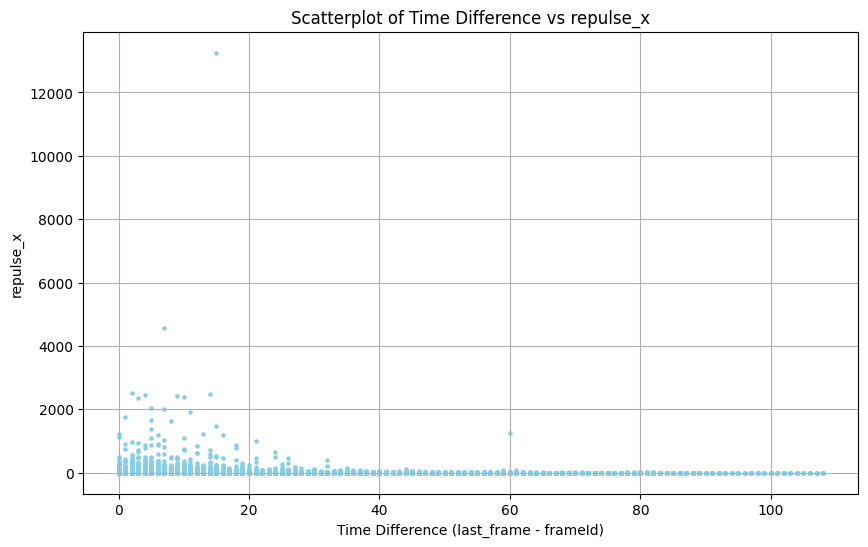

In [154]:
repulsion_test_inf_test = repulsion_test.query('frameId >5')
# Calculate the x-axis values: last_frame - frameId
repulsion_test_inf_test['time_diff'] = repulsion_test_inf_test['last_frame'] - repulsion_test_inf_test['frameId']

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(repulsion_test_inf_test['time_diff'], repulsion_test_inf_test['repulse_total'], s=5, color='skyblue', alpha=1)
plt.title('Scatterplot of Time Difference vs repulse_x')
plt.xlabel('Time Difference (last_frame - frameId)')
plt.ylabel('repulse_x')
plt.grid(True)
plt.show()

In [123]:
repulsion_test.groupby(['gameId','playId','nflId']).repulse_total.agg(func = 'mean')

gameId      playId  nflId  
2022090800  56      38577.0    0.568929
                    41239.0    0.443515
                    42816.0    0.273299
                    43294.0    1.055906
                    43298.0    0.598987
                                 ...   
2022091200  3826    47941.0    0.225122
                    52435.0    0.984486
                    52456.0    0.330451
                    54505.0    0.555468
                    54618.0    0.221039
Name: repulse_total, Length: 16203, dtype: float32

In [155]:
repulsion_test.groupby(['gameId','playId','nflId']).repulse_total.agg(func = 'mean').mean()

0.6838041

In [156]:
repulsion_test.groupby(['gameId','playId','nflId']).repulse_total.agg(func = 'mean').median()

0.058224127

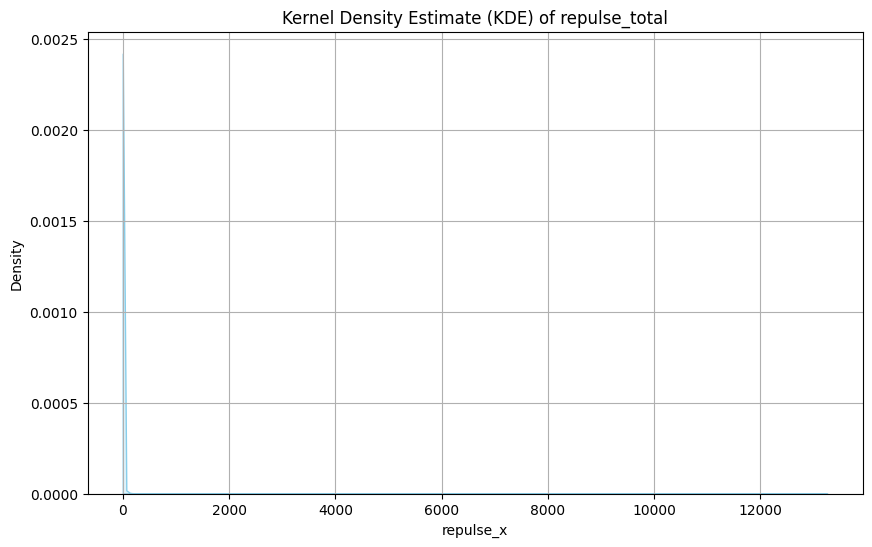

In [157]:
repulse_total_values_test = repulsion_test['repulse_total']

plt.figure(figsize=(10, 6))
sns.kdeplot(repulse_total_values_test, fill=True, color='skyblue')
plt.title('Kernel Density Estimate (KDE) of repulse_total')
plt.xlabel('repulse_x')
plt.ylabel('Density')
plt.grid(True)
plt.show()